In [2]:
# Using LogisticRegression()

Performance Metrics:
Accuracy: 0.87
Precision: 0.73
Recall: 0.85
ROC AUC: 0.91

Confusion Matrix:
[[28  4]
 [ 2 11]]


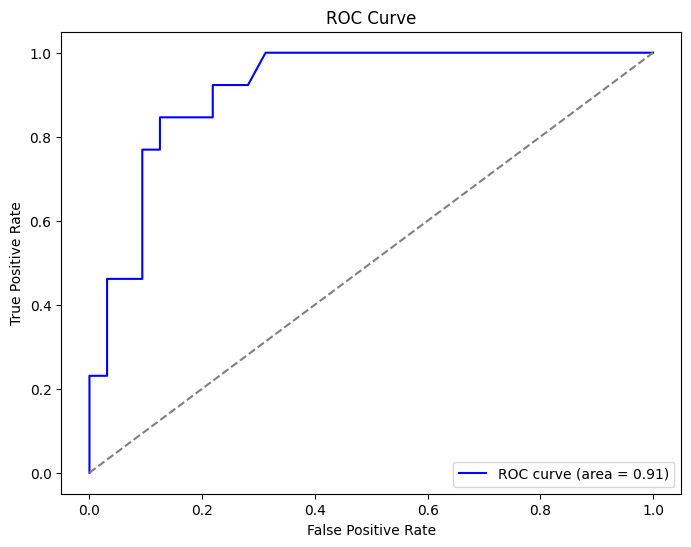

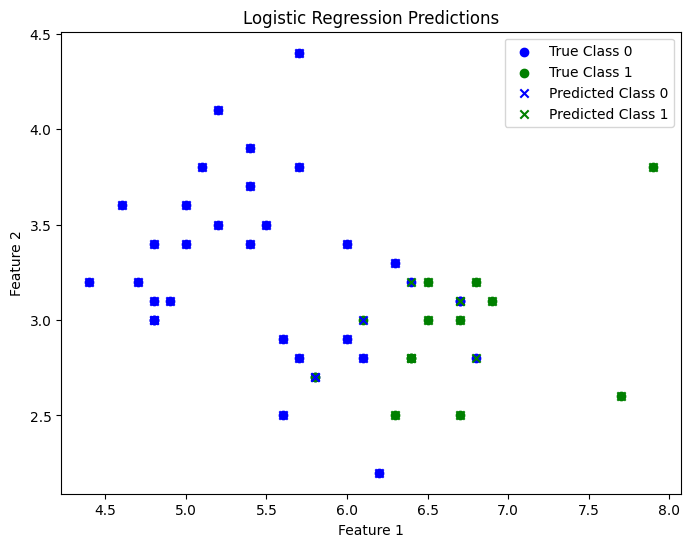

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, we only select the "Iris-Virginica" class (class 2)
# Convert it to a binary problem (1 if Virginica, 0 otherwise)
y = (y == 2).astype(int)

# Use only two features for easier 2D visualization
X = X[:, :2]  # Select the first two features for simplicity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the predictions
plt.figure(figsize=(8, 6))

# Plot true labels in the test set
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='True Class 0', marker='o')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='green', label='True Class 1', marker='o')

# Overlay predicted labels in the test set
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='blue', marker='x', label='Predicted Class 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='green', marker='x', label='Predicted Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions')
plt.legend(loc="best")
plt.show()
